In [1]:
!pip install yfinance
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
from datetime import date, timedelta

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
today = date.today()

date1 = today.strftime("%Y-%m-%d")
end_date = date1
date2 = date.today() - timedelta(days=365)
date2 = date2.strftime("%Y-%m-%d")
start_date = date2

data = yf.download('DOGE-USD', start=start_date, end=end_date, progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-05,0.122614,0.125375,0.121572,0.124996,0.124996,334091552
1,2022-03-06,0.125025,0.125611,0.120384,0.120766,0.120766,400458464
2,2022-03-07,0.120769,0.122563,0.115015,0.117105,0.117105,513014829
3,2022-03-08,0.117106,0.119724,0.115838,0.117029,0.117029,491414294
4,2022-03-09,0.117047,0.123734,0.116766,0.121588,0.121588,519157507


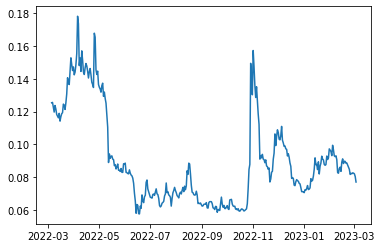

In [4]:
plt.plot(data["Date"], data["High"])

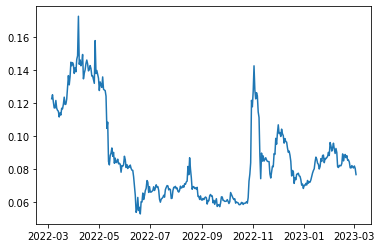

In [5]:
plt.plot(data["Date"], data["Open"])

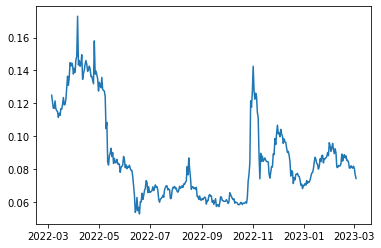

In [6]:
plt.plot(data["Date"], data["Close"])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

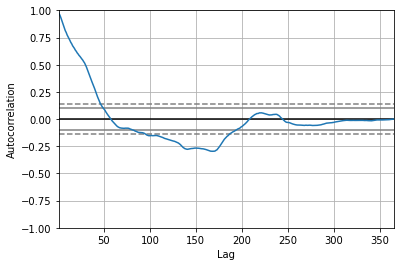

In [7]:
pd.plotting.autocorrelation_plot(data["Close"])

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model="multiplicative", period = 6)

<Figure size 432x288 with 0 Axes>

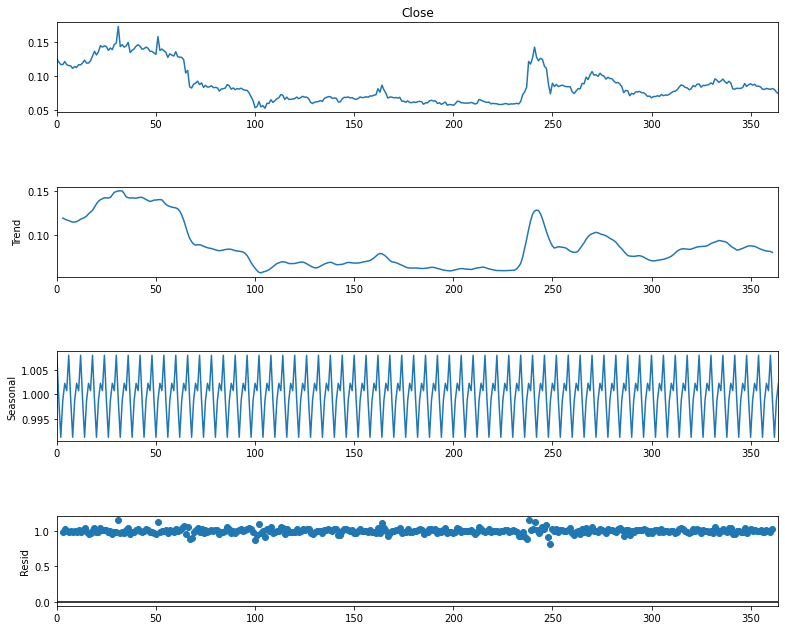

In [9]:
fig = plt.figure()  
fig = result.plot() 
fig.set_size_inches(12, 10)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

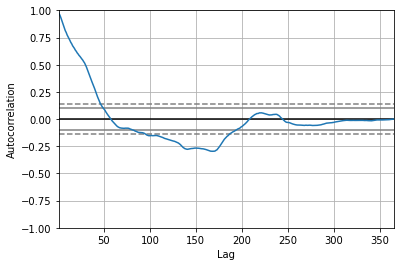

In [10]:
pd.plotting.autocorrelation_plot(data["Close"])

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


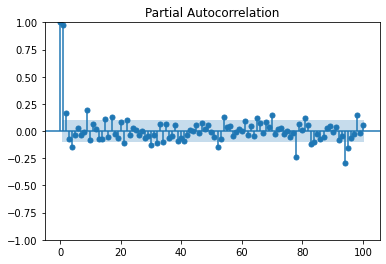

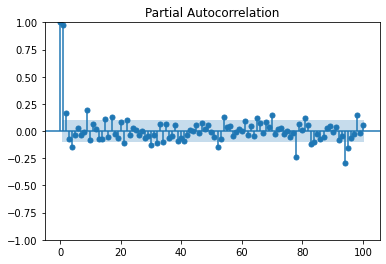

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [12]:
p, d, q = 12, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p,d,q))  
fit = model.fit()  
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  365
Model:                ARIMA(12, 1, 2)   Log Likelihood                1406.272
Date:                Sun, 05 Mar 2023   AIC                          -2782.544
Time:                        21:28:12   BIC                          -2724.087
Sample:                             0   HQIC                         -2759.310
                                - 365                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0723      1.514     -0.048      0.962      -3.039       2.895
ar.L2          0.0599      0.856      0.070      0.944      -1.618       1.738
ar.L3          0.0991      0.156      0.634      0.5